In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
dataset=pd.read_csv("student_scores.csv")
dataset.head()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


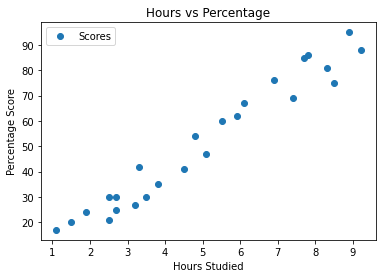

In [8]:
#visualizing data set
dataset.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

In [25]:
y=dataset["Scores"]
X0=np.ones((25,1))
X1=dataset['Hours']
X=np.column_stack((X0,X1))


# using the normal equation method

In [10]:
#y=a0+a1x1 for one feature linear regression a=(XT.X)-1.(XT.y)
theta=np.matmul(np.linalg.inv(np.matmul(X.T,X)),np.matmul(X.T,y))
theta

array([2.48367341, 9.77580339])

### the values of a0 and a1 have been found

In [14]:
y_pred=np.matmul(X,theta)

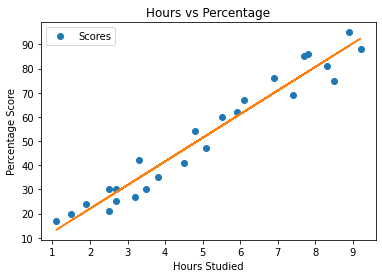

In [15]:
#visualizing data set
dataset.plot(x='Hours', y='Scores', style='o')
plt.plot(X1,y_pred)
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()


# predicting a new value

In [18]:
def prediction(x):
    return np.matmul(np.column_stack((1,x)),theta)[0]

In [37]:
print("predicted value for 9.25 hours is ",prediction(9.25))

predicted value for 9.25 hours is  92.90985477015735


# gradient descent method

In [228]:
#lets write some functions

In [181]:
def cost(theta,X,y):
    j= np.sum((y-np.matmul(X,theta))**2)/(2*len(X))
    return j

In [160]:
def update(theta,X,y,alpha):
    theta=theta - (np.sum((np.matmul(X,theta)-y)*X,axis=0).reshape(2,1)/len(X))*alpha
    return theta

In [161]:
def linear_reggresor(theta,X,y,alpha,epochs):
    for i in range(epochs):
        print("epoch:",i)
        print("cost before the iteration : ",cost(theta,X,y))
        theta=update(theta,X,y,alpha)
    return theta

In [229]:
#y=a0+a1x1 randomly giving any starting point 
theta=np.array([10,15]).reshape((2,1))
y=np.array(y).reshape((len(y),1))

In [230]:
theta=linear_reggresor(theta,X,y,.001,20000)

epoch: 0
cost before the iteration :  665.815
epoch: 1
cost before the iteration :  624.9905768740005
epoch: 2
cost before the iteration :  586.740982219181
epoch: 3
cost before the iteration :  550.903813358491
epoch: 4
cost before the iteration :  517.3269108741597
epoch: 5
cost before the iteration :  485.8677125323806
epoch: 6
cost before the iteration :  456.3926479580438
epoch: 7
cost before the iteration :  428.7765714892819
epoch: 8
cost before the iteration :  402.9022308037032
epoch: 9
cost before the iteration :  378.6597690600769
epoch: 10
cost before the iteration :  355.94625844154615
epoch: 11
cost before the iteration :  334.6652631197695
epoch: 12
cost before the iteration :  314.7264297843205
epoch: 13
cost before the iteration :  296.04510399871526
epoch: 14
cost before the iteration :  278.541970754099
epoch: 15
cost before the iteration :  262.14271769436925
epoch: 16
cost before the iteration :  246.7777195827726
epoch: 17
cost before the iteration :  232.38174267

In [232]:
y_pred=np.matmul(X,theta)

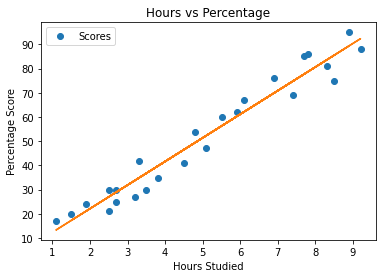

In [233]:
#visualizing data set
dataset.plot(x='Hours', y='Scores', style='o')
plt.plot(X1,y_pred)
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

In [234]:
theta

array([[2.6262788 ],
       [9.75278461]])